Based on a post @ [Towards Data Science](https://towardsdatascience.com/understanding-analysis-of-variance-anova-6aebd01d44c8).

## Understanding ANOVA

> "In ANOVA, the total amount of variation in a dataset is split into two types, i.e. the amount allocated to chance and amount assigned to particular causes."

>> "Its basic principle is to test the variances among population means by assessing the amount of variation within group items, proportionate to the amount of variation between groups."

>> "Within the sample, the variance is because of the random unexplained disturbance whereas different treatment may cause between sample variance."

Hypothesis testing:

$$
\begin{align}
H_0 : & \quad \mu_i = \mu_j,\ \forall\ i,j \in K \\
H_1 : & \quad \exists\ i,j :\ \mu_i \neq \mu_j
\end{align}
$$

where $K$ represents the groups.

### ANOVA *vs* $t$-Test


In [1]:
from IPython.display import Image

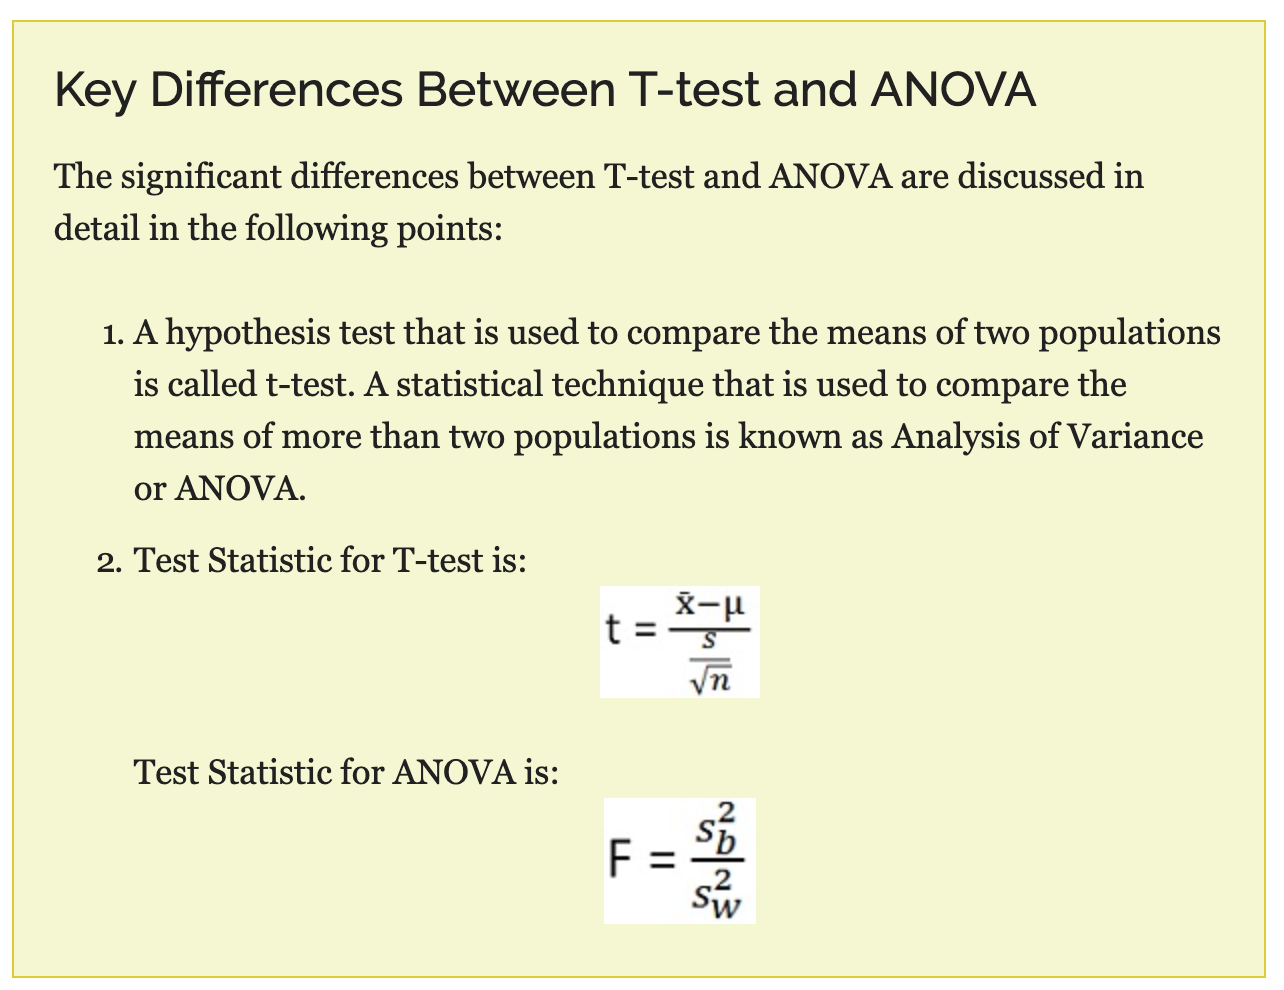

In [2]:
Image('t-test-anova.png')

### Factors and levels

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame.from_dict({'0mg': [9, 8, 7, 8, 8, 9, 8],
                             '50mg': [7, 6, 6, 7, 8, 7, 6],
                             '100mg': [4, 3, 2, 3, 4, 3, 2]})
df

,0mg,50mg,100mg
0,9,7,4
1,8,6,3
2,7,6,2
3,8,7,3
4,8,8,4
5,9,7,3
6,8,6,2


<u>Factors</u> (variables): dosage.

<u>Levels</u>: 0 mg, 50 mg, 100 mg.

### Types of ANOVA

- <u>One-way ANOVA</u>: "One factor with at least two levels, levels are **independent**."

In [24]:
df

,0mg,50mg,100mg
0,9,7,4
1,8,6,3
2,7,6,2
3,8,7,3
4,8,8,4
5,9,7,3
6,8,6,2


- <u>Repeated-Measure ANOVA</u>: "One factor with at least two levels, levels are **dependent**."

In [25]:
df.columns = ['Day 1', 'Day 2', 'Day 3']
df

,Day 1,Day 2,Day 3
0,9,7,4
1,8,6,3
2,7,6,2
3,8,7,3
4,8,8,4
5,9,7,3
6,8,6,2


- <u>Factorial ANOVA</u>: "Two or more factors (each of which with at least two levels), levels can be either independent, dependent, or both (mixed)."

In [ ]:
df = df[:-1]
df.loc[:,'gender'] = ['Men'] * 3 + ['Women'] * 3
df

In [51]:
df.set_index(['gender', [1,2,3]*2])

Day 1  Day 2  Day 3
gender                       
Men    1      9      7      4
       2      8      6      3
       3      7      6      2
Women  1      8      7      3
       2      8      8      4
       3      9      7      3

### Assumptions in ANOVA

- "It is assumed that the sample is drawn from the normally distributed population and the population variance is equal."
- "Error between cases are independent of each other."
- "Homogeneity of variance by population variance in different levels of each independent variable are equal."

### Main Effects in ANOVA

> "Pretend we are comparing the test scores of people who have received a medication(100 mg dosage group) and people who have not received a medication(0mg dosage group)."

>> "The 0mg condition has a mean of 60, while the 100mg condition has a mean of 80. This could be represented in a graph like this:"


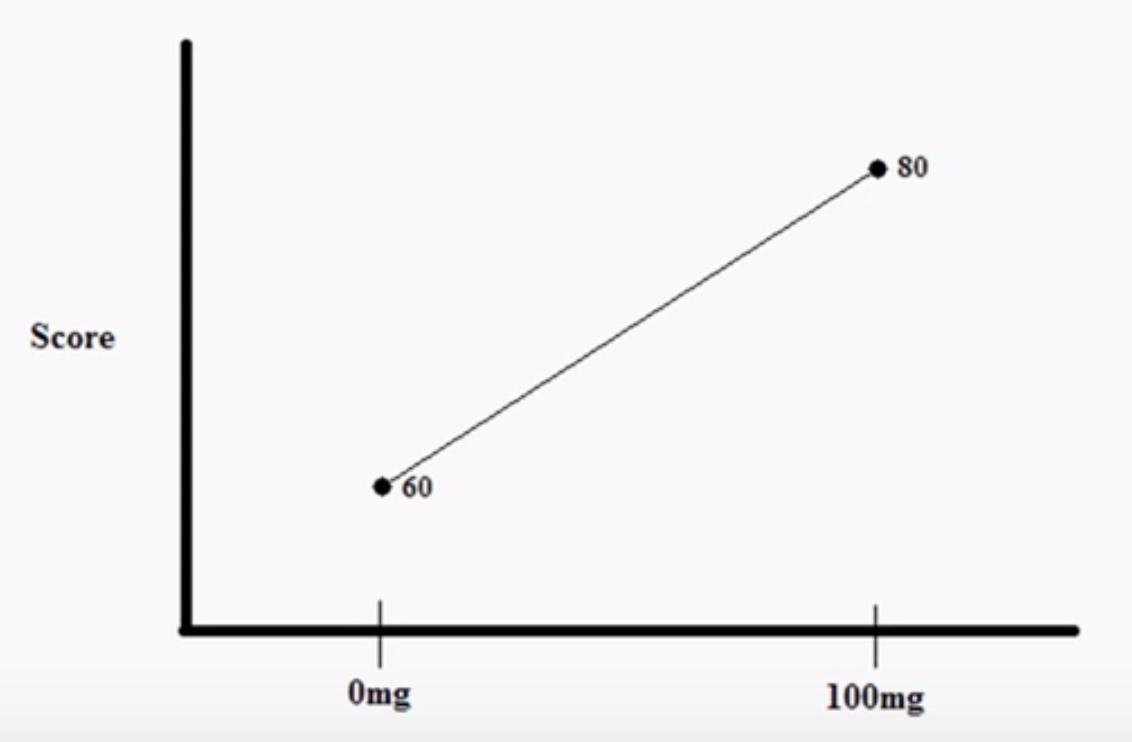

In [53]:
Image('main-effects.png')

### Interaction Effects in ANOVA

> "Here we have a Factorial ANOVA with two factors: dosage(0mg and 100mg) and gender(men and women)."

>> "In the 0mg dosage condition, men have a mean of 60 while women have a mean of 80."

>> "In the 100mg dosage condition, men have a mean of 80 while women have a mean of 50."

>> "This could be represented in a graph like this:"

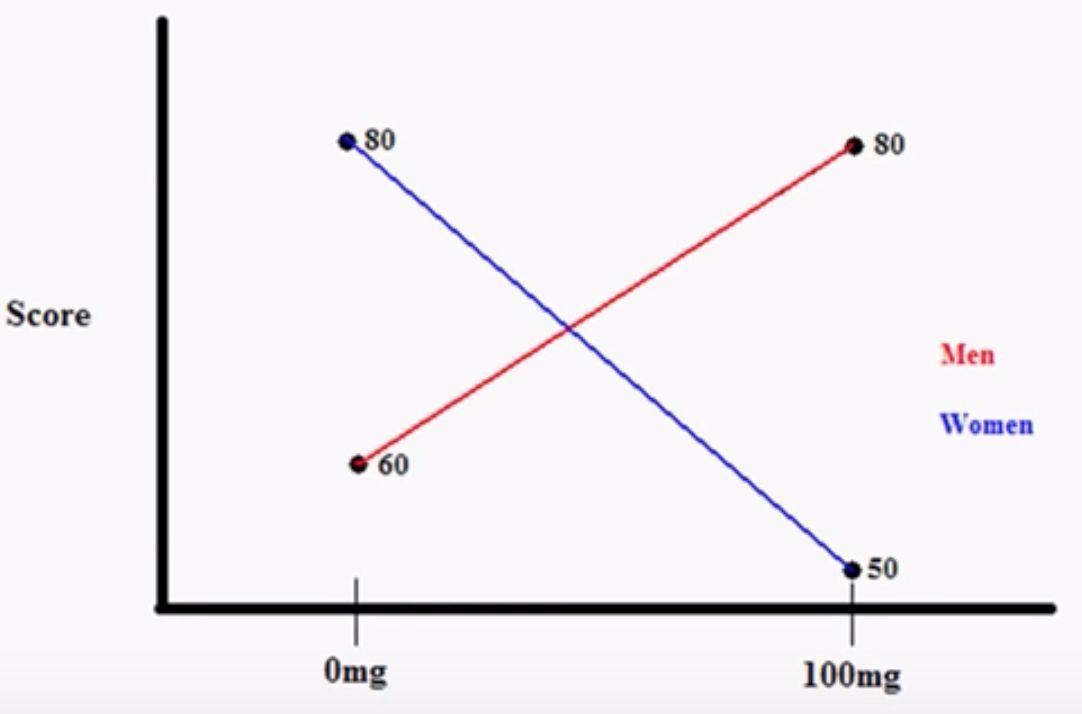

In [54]:
Image('interaction-effects.png')

### The F Distribution in ANOVA

> "When doing an ANOVA, we calculate an 'F' statistic. It is similar to other statistics such as 'z' and 't'."

$$
F = \displaystyle\frac{\text{Treatment differences} + \text{Random differences}}{\text{Random differences}}
$$

> "If there are no treatment differences (that is, if there is no actual effect), we expect F to be 1. If there are treatment differences, we expect F to be greater than 1."

> "The F statistic has its own one-tailed [distribution](https://en.wikipedia.org/wiki/F-distribution)".

### *Anti-anxiety Medication* (One-Way ANOVA)

> "Researchers want to test a new anti-anxiety medication. They split participants into three conditions (0mg, 50mg, and 100mg), then ask them to rate their anxiety level on a scale of 1–10. Are there any differences between the three conditions using $\alpha = 0.05$?"


In [57]:
data = pd.DataFrame.from_dict({'0mg': [9, 8, 7, 8, 8, 9, 8],
                               '50mg': [7, 6, 6, 7, 8, 7, 6],
                               '100mg': [4, 3, 2, 3, 4, 3, 2]})
data

,0mg,50mg,100mg
0,9,7,4
1,8,6,3
2,7,6,2
3,8,7,3
4,8,8,4
5,9,7,3
6,8,6,2


**Steps**:

1. Define Null and Alternative Hypotheses

$$
\begin{align}
H_0 : & \mu_{0 \text{ mg }} = \mu_{50 \text{ mg }} = \mu_{100 \text{ mg }} \\
H_1 : & \mu_{0 \text{ mg }} \neq \mu_{50 \text{ mg }} \vee \mu_{0 \text{ mg }} \neq \mu_{100 \text{ mg }} \vee \mu_{50 \text{ mg }} \neq \mu_{100 \text{ mg }}
\end{align}
$$

2. State Alpha: $\alpha = 0.05$.

3. Calculate Degrees of Freedom:
    - Total number of observations $N = 21$.
    - Number of observations per group $n_{0 \text{ mg }} = n_{50 \text{ mg }} = n_{100 \text{ mg }} = 7$.
    - Number of groups $k = 3$.

$$
\begin{align}
df_{\text{between}} = k - 1 = 2 \\
df_{\text{within}} = N - k = 18 \\
df_{\text{Total}} = N - 1 = 20
\end{align}
$$

4. State Decision Rule:
- Look up critical value $F_{\text{crit}} = F(df_{\text{between}}, df_{\text{within}} |\ \alpha)$.

In [56]:
from scipy.stats import f

In [63]:
alpha = 0.05
nobs_per_group, ngroups = data.shape
df_between, df_within = ngroups - 1, ngroups * (nobs_per_group - 1)

In [64]:
F_crit = f.ppf(q=(1-alpha), dfn=df_between, dfd=df_within)
F_crit

3.554557145661787

5. Calculate Test Statistic

$$
F = \displaystyle\frac{ SS_{\text{B}}^2 }{df_{\text{between}}} \cdot \frac{df_{\text{within}}}{ SS_{\text{W}}^2 }
$$

where $SS_{B}^{2} = \displaystyle\sum_{j} n_j (\bar x_j - \bar x)^2$ is the sum of squares between groups and $SS_{W}^{2} = \displaystyle\sum_{i} (x_{ij} - \bar x_j)^2$.

In [72]:
nobs_each_group = data.apply(len)
means_each_group = data.mean()
mean_across_groups = means_each_group.mean()

In [75]:
import numpy as np

In [80]:
SS_B = nobs_each_group.dot((means_each_group - mean_across_groups)**2)
SS_W = np.sum((data - means_each_group)**2).sum()

In [91]:
F_test = (SS_B / df_between) / (SS_W / df_within)
F_test

86.33333333333333

6. State Results

If $F_{\text{test}} > F_{\text{crit}}$, reject the null hypothesis.

In [92]:
if F_test > F_crit:
    print('REJECT NULL HYPOTHESIS!')
else:
    print('Failed to reject null hypothesis.')

REJECT NULL HYPOTHESIS!


7. State Conclusion

> "The three conditions differed significantly on anxiety level".